# Predicting Consumer Spending with a Decision Tree

This model will construct a decision tree that will recursively test the data categories to determine the ones that are most important in predicting a consumers total spend. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel("C:/Users/Matteo/Documents/capital_one/capital_one_data.xlsx")

In [2]:
data

CUSTOMER_ID            REGION   AGE  PARENT     OCCUPATION  \
0               0           England  48.0       0       Employed   
1               1  Northern Ireland  42.0       0       Employed   
2               2           England  28.0       1       Employed   
3               3           England  31.0       0     Unemployed   
4               4           England  47.0       1        Student   
...           ...               ...   ...     ...            ...   
9995         9995           England  61.0       1        Retired   
9996         9996           England  81.0       0       Employed   
9997         9997           England  18.0       0  Self-employed   
9998         9998          Scotland  46.0       0        Student   
9999         9999           England  47.0       1       Employed   

      MOBILE_APP_USER CARD_COLOUR  CREDIT_LIMIT  SPEND_M1_TRAVEL  \
0                 1.0        Blue           250             5.71   
1                 1.0         Red           500            38.27   
2                 1.0       Black           250            32.90   
3                 1.0       Black           500            32.60   
4                 1.0       Black          1000           262.42   
...               ...         ...           ...              ...   
9995              0.0        Blue          1000            81.31   
9996              1.0         Red           250            56.32   
9997              1.0         Red           250            11.01   
9998              0.0       Black           500             8.52   
9999              1.0         Red           250            29.72   

      SPEND_M1_GROCERY  SPEND_M1_OTHER  SPEND_M2_TRAVEL  SPEND_M2_GROCERY  \
0                16.60            4.95             8.64             13.04   
1                43.51           79.22            90.10              0.00   
2                59.49            8.04            36.07             56.74   
3                47.55           23.87            14.45             21.08   
4                 0.00           26.70           229.87              0.00   
...                ...             ...              ...               ...   
9995             64.15           26.90            96.28             75.97   
9996             21.46           74.32            31.61             28.13   
9997             17.66            6.01             7.98             12.79   
9998              8.24            5.75            16.58             16.02   
9999             77.63            1.76            59.69             59.58   

      SPEND_M2_OTHER  SPEND_M3_TOTAL  
0               7.49           30.51  
1              78.40           20.41  
2              18.74          109.33  
3              10.58           50.34  
4             183.74          184.99  
...              ...             ...  
9995           31.85           39.06  
9996            2.26          144.98  
9997            4.35           69.22  
9998           11.19           52.89  
9999            9.53          107.30  

[10000 rows x 15 columns]

In [3]:
data.isnull().sum()

CUSTOMER_ID          0
REGION              35
AGE                 40
PARENT               0
OCCUPATION          42
MOBILE_APP_USER     42
CARD_COLOUR         40
CREDIT_LIMIT         0
SPEND_M1_TRAVEL      0
SPEND_M1_GROCERY     0
SPEND_M1_OTHER       0
SPEND_M2_TRAVEL      0
SPEND_M2_GROCERY     0
SPEND_M2_OTHER       0
SPEND_M3_TOTAL       0
dtype: int64

In [4]:
data.dtypes

CUSTOMER_ID           int64
REGION               object
AGE                 float64
PARENT                int64
OCCUPATION           object
MOBILE_APP_USER     float64
CARD_COLOUR          object
CREDIT_LIMIT          int64
SPEND_M1_TRAVEL     float64
SPEND_M1_GROCERY    float64
SPEND_M1_OTHER      float64
SPEND_M2_TRAVEL     float64
SPEND_M2_GROCERY    float64
SPEND_M2_OTHER      float64
SPEND_M3_TOTAL      float64
dtype: object

The data needs to be cleaned. This requires finding a solution to the missing values and creating a format to accomodate the categorical data. Since the missing values are relatively few, they will be excluded.

In [5]:
mod_data = data.dropna( axis=0, how='any')

In [6]:
# use one hot encoding to encode object to integer

!pip install category_encoders

Now the cateogorical data must be encoded to an integer equivalent format in order to be passed to the decision tree.

In [7]:
import category_encoders as ce

In [8]:
encoder = ce.OneHotEncoder(use_cat_names=True)

In [9]:
mod_data2 = encoder.fit_transform(mod_data)

mod_data3 = encoder.transform(mod_data)

#convert mobile app user from float to int 
mod_data3['MOBILE_APP_USER'] = mod_data3.MOBILE_APP_USER.astype(int)

mod_data3

CUSTOMER_ID  REGION_England  REGION_Northern Ireland  REGION_Scotland  \
0               0               1                        0                0   
1               1               0                        1                0   
2               2               1                        0                0   
3               3               1                        0                0   
4               4               1                        0                0   
...           ...             ...                      ...              ...   
9995         9995               1                        0                0   
9996         9996               1                        0                0   
9997         9997               1                        0                0   
9998         9998               0                        0                1   
9999         9999               1                        0                0   

      REGION_Wales   AGE  PARENT  OCCUPATION_Employed  OCCUPATION_Unemployed  \
0                0  48.0       0                    1                      0   
1                0  42.0       0                    1                      0   
2                0  28.0       1                    1                      0   
3                0  31.0       0                    0                      1   
4                0  47.0       1                    0                      0   
...            ...   ...     ...                  ...                    ...   
9995             0  61.0       1                    0                      0   
9996             0  81.0       0                    1                      0   
9997             0  18.0       0                    0                      0   
9998             0  46.0       0                    0                      0   
9999             0  47.0       1                    1                      0   

      OCCUPATION_Student  ...  CARD_COLOUR_Red  CARD_COLOUR_Black  \
0                      0  ...                0                  0   
1                      0  ...                1                  0   
2                      0  ...                0                  1   
3                      0  ...                0                  1   
4                      1  ...                0                  1   
...                  ...  ...              ...                ...   
9995                   0  ...                0                  0   
9996                   0  ...                1                  0   
9997                   0  ...                1                  0   
9998                   1  ...                0                  1   
9999                   0  ...                1                  0   

      CREDIT_LIMIT  SPEND_M1_TRAVEL  SPEND_M1_GROCERY  SPEND_M1_OTHER  \
0              250             5.71             16.60            4.95   
1              500            38.27             43.51           79.22   
2              250            32.90             59.49            8.04   
3              500            32.60             47.55           23.87   
4             1000           262.42              0.00           26.70   
...            ...              ...               ...             ...   
9995          1000            81.31             64.15           26.90   
9996           250            56.32             21.46           74.32   
9997           250            11.01             17.66            6.01   
9998           500             8.52              8.24            5.75   
9999           250            29.72             77.63            1.76   

      SPEND_M2_TRAVEL  SPEND_M2_GROCERY  SPEND_M2_OTHER  SPEND_M3_TOTAL  
0                8.64             13.04            7.49           30.51  
1               90.10              0.00           78.40           20.41  
2               36.07             56.74           18.74          109.33  
3               14.45             21.08           10.58           50.34  
4              229.8

In [10]:
mod_data3.isnull().sum()

CUSTOMER_ID                 0
REGION_England              0
REGION_Northern Ireland     0
REGION_Scotland             0
REGION_Wales                0
AGE                         0
PARENT                      0
OCCUPATION_Employed         0
OCCUPATION_Unemployed       0
OCCUPATION_Student          0
OCCUPATION_Self-employed    0
OCCUPATION_Retired          0
MOBILE_APP_USER             0
CARD_COLOUR_Blue            0
CARD_COLOUR_Red             0
CARD_COLOUR_Black           0
CREDIT_LIMIT                0
SPEND_M1_TRAVEL             0
SPEND_M1_GROCERY            0
SPEND_M1_OTHER              0
SPEND_M2_TRAVEL             0
SPEND_M2_GROCERY            0
SPEND_M2_OTHER              0
SPEND_M3_TOTAL              0
dtype: int64

In [11]:
mod_data3.dtypes

CUSTOMER_ID                   int64
REGION_England                int64
REGION_Northern Ireland       int64
REGION_Scotland               int64
REGION_Wales                  int64
AGE                         float64
PARENT                        int64
OCCUPATION_Employed           int64
OCCUPATION_Unemployed         int64
OCCUPATION_Student            int64
OCCUPATION_Self-employed      int64
OCCUPATION_Retired            int64
MOBILE_APP_USER               int32
CARD_COLOUR_Blue              int64
CARD_COLOUR_Red               int64
CARD_COLOUR_Black             int64
CREDIT_LIMIT                  int64
SPEND_M1_TRAVEL             float64
SPEND_M1_GROCERY            float64
SPEND_M1_OTHER              float64
SPEND_M2_TRAVEL             float64
SPEND_M2_GROCERY            float64
SPEND_M2_OTHER              float64
SPEND_M3_TOTAL              float64
dtype: object

Exploring the data to arrive at some preliminary hypotheses

In [12]:
mod_data3.describe()

CUSTOMER_ID  REGION_England  REGION_Northern Ireland  REGION_Scotland  \
count  9805.000000     9805.000000              9805.000000      9805.000000   
mean   4999.565324        0.849363                 0.028557         0.077817   
std    2886.345083        0.357713                 0.166566         0.267898   
min       0.000000        0.000000                 0.000000         0.000000   
25%    2502.000000        1.000000                 0.000000         0.000000   
50%    4999.000000        1.000000                 0.000000         0.000000   
75%    7502.000000        1.000000                 0.000000         0.000000   
max    9999.000000        1.000000                 1.000000         1.000000   

       REGION_Wales          AGE       PARENT  OCCUPATION_Employed  \
count   9805.000000  9805.000000  9805.000000          9805.000000   
mean       0.044263    45.922387     0.294340             0.387965   
std        0.205690    14.442884     0.455769             0.487311   
min        0.000000    18.000000     0.000000             0.000000   
25%        0.000000    35.000000     0.000000             0.000000   
50%        0.000000    46.000000     0.000000             0.000000   
75%        0.000000    56.000000     1.000000             1.000000   
max        1.000000    99.000000     1.000000             1.000000   

       OCCUPATION_Unemployed  OCCUPATION_Student  ...  CARD_COLOUR_Red  \
count            9805.000000         9805.000000  ...      9805.000000   
mean                0.135237            0.230291  ...         0.479041   
std                 0.341994            0.421040  ...         0.499586   
min                 0.000000            0.000000  ...         0.000000   
25%                 0.000000            0.000000  ...         0.000000   
50%                 0.000000            0.000000  ...         0.000000   
75%                 0.000000            0.000000  ...         1.000000   
max                 1.000000            1.000000  ...         1.000000   

       CARD_COLOUR_Black  CREDIT_LIMIT  SPEND_M1_TRAVEL  SPEND_M1_GROCERY  \
count        9805.000000   9805.000000      9805.000000       9805.000000   
mean            0.361856    460.402856        41.413251         45.565813   
std             0.480562    274.839798        54.931079         54.016307   
min             0.000000    250.000000         0.000000          0.000000   
25%             0.000000    250.000000         4.920000         12.610000   
50%             0.000000    250.000000        19.740000         27.530000   
75%             1.000000    500.000000        57.200000         57.360000   
max             1.000000   1000.000000       295.100000        311.510000   

       SPEND_M1_OTHER  SPEND_M2_TRAVEL  SPEND_M2_GROCERY  SPEND_M2_OTHER  \
count     9805.000000      9805.000000       9805.000000     9805.000000   
mean        32.420189        41.019679         46.806864       32.296328   
std         45.440332        50.579850         50.201258       44.824792   
min          0.000000         0.000000          0.000000        0.000000   
25%          4.750000         5.740000         15.750000        4.790000   
50%         15.810000        23.170000         30.860000       16.200000   
75%         41.420000        55.980000         57.840000       41.520000   
max        396.000000       294.890000        312.600000      396.000000   

       SPEND_M3_TOTAL  
count     9805.000000  
mean       113.353242  
std        105.461015  
min          0.000000  
25%         39.490000  
50%         82.610000  
75%        146.600000  
max        621.310000  

[8 rows x 24 columns]

A lot can be inferred from the averages of each variable in the data. For example: 84.9% of Capital One UK customers are located in England, only 29.4% of them are parents, and 68% of them are between the ages of 30 and 60.

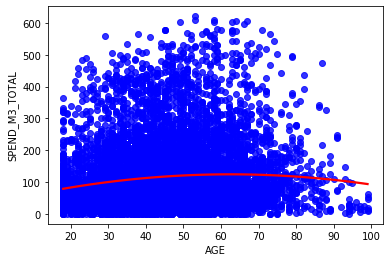

In [13]:
sns.regplot(x='AGE', y='SPEND_M3_TOTAL', data=mod_data3, 
            scatter_kws={"color": "blue"}, 
            line_kws={"color": "red"}, 
            order=2, ci=None)

The polynomial regression shows that the average amount spent per age group is relatively consistent. However, the highest by a slight margin are those between the ages of 60 and 70.

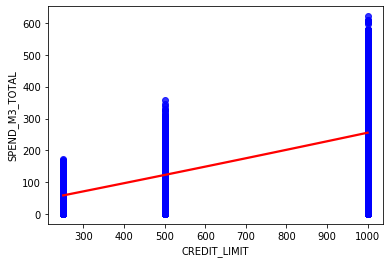

In [14]:
sns.regplot(x='CREDIT_LIMIT', y='SPEND_M3_TOTAL', data=mod_data3, 
            scatter_kws={"color": "blue"}, 
            line_kws={"color": "red"}, 
            order=2, ci=None)

As expected credit limit is positively correlated with consumer spending.

Dividing the data into the training set and the testing set. 

In [15]:
X = mod_data3.iloc[:, 1:-1].values
Y = mod_data3.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [16]:
# build the model, import a decision tree regressor from SciKit Learn
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import plot_tree

#instantiate the model random_state=42
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [17]:
#Create the figure 
plt.figure(figsize=(400,100))

#Create the tree plot feature_names = var_columns, #Feature names class_names = ["0","1"], #Class names
plot_tree(regressor, rounded = True, filled = True)

plt.show()

In [18]:
Y_pred = regressor.predict(X_test) 

In [19]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test, Y_pred))

52.685018188621264